# k-means clustering

In [8]:
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [9]:
class _KMeans:

    def __init__(self, n_clusters=8, init='k-means++'):
        self.n_clusters = n_clusters
        self.init = init
        self.x = None
        self.centroids = None
        self.centroids_old = None
        self.labels_ = None

    def fit(self, x):
        self.x = np.array(x)
        self._init_centroids()  # Step 0
        while not np.array_equal(self.centroids_old, self.centroids):
            self.centroids_old = self.centroids.copy()
            self._calculate_labels()  # Step 1
            self._calculate_centroids()  # Step 2
        return self

    def _init_centroids(self):
        if self.init == 'k-means++':
            # first random centroid
            centroids_indexes = [np.random.randint(len(self.x))]
            self.centroids = [self.x[centroids_indexes[0]]]

            # remaining centroids
            while len(self.centroids) < self.n_clusters:

                # filtered x values
                x = [[i, v] for i, v in
                     enumerate(self.x) if i not in centroids_indexes]

                # calculated distances and probabilities (max dist -> larger prob)
                d = [self._calculate_distance(self.centroids[-1], x[i][1])
                     for i in range(len(x))]
                p = d / sum(np.power(d, 2))

                # picking best centroid
                centroid = random.choices(x, p)[0]
                centroids_indexes.append(centroid[0])
                self.centroids.append(centroid[1])

        else:  # pick n random centroids
            self.centroids = \
                [self.x[i] for i in random.sample(
                    range(len(self.x)), self.n_clusters)]

    def _calculate_labels(self):
        d = [[self._calculate_distance(i, c)
              for c in self.centroids] for i in self.x]
        self.labels_ = [np.argmin(i) for i in d]  # index of min value

    def _calculate_centroids(self):
        self.centroids.clear()
        for c in range(self.n_clusters):
            x = [self.x[li] for li, lc in enumerate(self.labels_) if lc == c]
            x = np.array(x).T  # make a list of one type variable values
            self.centroids.append([sum(i) / len(i) for i in x])

    def _calculate_distance(self, x1, x2):
        return np.sqrt(sum(  # Euclidean distance
            [np.power(x1[j] - x2[j], 2) for j in range(len(x1))]
        ))


## Demonstration

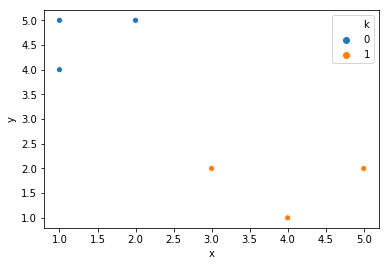

In [10]:
X = pd.DataFrame({
    'x': [1, 2, 1, 3, 5, 4],
    'y': [5, 5, 4, 2, 2, 1]
})
X['k'] = _KMeans(n_clusters=2).fit(X).labels_
sns.scatterplot(x=X['x'], y=X['y'], hue=X['k'])

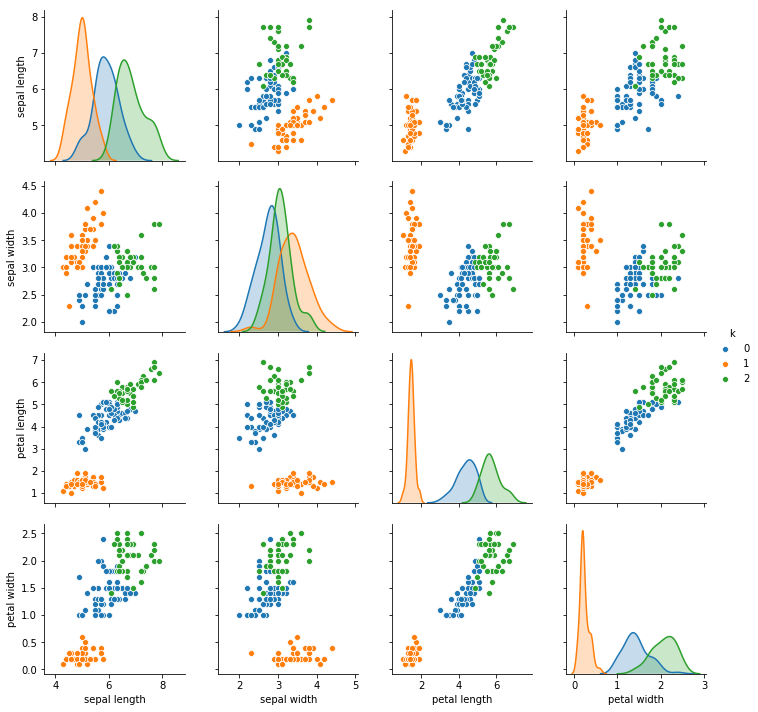

In [12]:
X = pd.read_csv('iris.data.csv')
X['k'] = _KMeans(n_clusters=3).fit(
    X[['sepal length', 'sepal width', 'petal length', 'petal width']]).labels_
sns.pairplot(X, vars=['sepal length', 'sepal width',
                      'petal length', 'petal width'], hue='k')
# sns.pairplot(X, vars=['sepal length', 'sepal width', 'petal length', 'petal width'], hue='class')